# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization,Dropout
from keras.initializers import HeNormal,lecun_normal
from keras.activations import swish, selu

2025-01-27 19:47:25.857979: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 19:47:25.865661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-27 19:47:25.874912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-27 19:47:25.877560: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 19:47:25.884953: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1738003649.147048   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738003649.175183   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738003649.175370   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [4]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


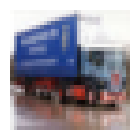

In [5]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))
    




I0000 00:00:1738003658.216063   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738003658.216281   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738003658.216358   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738003658.271711   93178 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [7]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories=[]
models=[]
dicc=[]

mejor_precision=0
mejor_modelo=None
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc

        mejor_modelo = model
    i+=1

Epoch 1/30


I0000 00:00:1738003710.726983   93265 service.cc:146] XLA service 0x758570001c90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738003710.727045   93265 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-27 19:48:30.886733: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-27 19:48:31.114615: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 100/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 74.3577 - sparse_categorical_accuracy: 0.1151

I0000 00:00:1738003711.811715   93265 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 11.6438 - sparse_categorical_accuracy: 0.1575 - val_loss: 2.0385 - val_sparse_categorical_accuracy: 0.2664
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.0157 - sparse_categorical_accuracy: 0.2649 - val_loss: 1.9154 - val_sparse_categorical_accuracy: 0.3052
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8989 - sparse_categorical_accuracy: 0.3102 - val_loss: 1.8628 - val_sparse_categorical_accuracy: 0.3300
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8284 - sparse_categorical_accuracy: 0.3402 - val_loss: 1.8131 - val_sparse_categorical_accuracy: 0.3452
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7711 - sparse_categorical_accuracy: 0.3581 - val_loss: 1.7528 - val_sparse_categorical_accuracy: 0.3710
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7154 - sparse_categorical_accuracy: 0.3810 - val_loss: 1.6892 - val_sparse_categorical_accuracy: 0.3866
Ep

In [9]:
print(mejor_modelo.optimizer.learning_rate.numpy())
print(mejor_precision)

0.007
0.47200000286102295


In [ ]:
train_loss, train_SC_accuracy = mejor_modelo.evaluate(x_train, y_train)
print("Pérdida:", test_loss, "Precisión:", test_accuracy)

In [ ]:
dicc.append({
    'Red neuronal normal': {

        'Tasa de aprendizaje': best_model['LR'],

        'Entrenamiento sparse categorical accuracy': best_model['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model['Tiempo Total(s)']

    }
})
for entrada in dicc:
    print(entrada)

### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=best_model['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_opti = Sequential()
model_opti.add(Input(shape=(32, 32,3)))
model_opti.add(Flatten())
for _ in range(20):
    model_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_opti.add(Dense(10, activation="softmax"))



model_opti.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history=model_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time = end_time - start_time

In [46]:
best_epoch_acc= max(history.history['sparse_categorical_accuracy'])
best_epoch_index = history.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': best_model['LR'],

        'Entrenamiento sparse categorical accuracy': history.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time,

        'Mejor época': best_epoch_index

    }
})



In [ ]:
for entrada in dicc:
    print(entrada)

### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [48]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_lotes = Sequential()
modelo_lotes.add(Input(shape=(32, 32,3)))
modelo_lotes.add(Flatten())

for _ in range(20):
    modelo_lotes.add(BatchNormalization())
    modelo_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
modelo_lotes.add(Dense(10, activation="softmax"))

In [ ]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories=[]
models_lotes=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    modelo_lotes.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=modelo_lotes.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_lotes.append(model)

In [ ]:
best_model_lotes = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_lotes)

In [55]:
dicc.append({
    'Red neuronal por lotes': {

        'Tasa de aprendizaje': best_model_lotes['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_lotes['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_lotes['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_lotes['Tiempo Total(s)']

    }
})

In [ ]:
for entrada in dicc:
    print(entrada)

In [ ]:
optimizer_lotes = tf.keras.optimizers.Nadam(learning_rate=best_model_lotes['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_lotes_opti = Sequential()
model_lotes_opti.add(Input(shape=(32, 32,3)))
model_lotes_opti.add(Flatten())
for _ in range(20):
    model_lotes_opti.add(BatchNormalization())
    model_lotes_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_lotes_opti.add(Dense(10, activation="softmax"))



model_lotes_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_lotes,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_lotes=model_lotes_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_lotes = end_time - start_time

In [58]:
best_epoch_acc= max(history_lotes.history['sparse_categorical_accuracy'])
best_epoch_index = history_lotes.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal por lotes con detención temprana': {

        'Tasa de aprendizaje': best_model_lotes['LR'],

        'Entrenamiento sparse categorical accuracy': history_lotes.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_lotes.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_lotes,

        'Mejor época': best_epoch_index

    }
})

In [ ]:
for entrada in dicc:
    print(entrada)

### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [60]:
x_train_norm = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_val_norm = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val))
x_test_norm = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

y_train_norm = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))
y_val_norm = (y_val - np.min(y_val)) / (np.max(y_val) - np.min(y_val))
y_test_norm = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

In [61]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_selu = Sequential()
model_selu.add(Input(shape=(32, 32,3)))
model_selu.add(Flatten())
for _ in range(20):
    model_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu.add(Dense(10, activation="softmax"))
    

In [ ]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories_selu=[]
models_selu=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_selu.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

In [ ]:
best_model_selu = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_selu)

In [65]:
dicc.append({
    'Red neuronal selu': {

        'Tasa de aprendizaje': best_model_selu['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_selu['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_selu['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_selu['Tiempo Total(s)']

    }
})

In [ ]:
for entry in dicc:
    print(entry)

In [ ]:
optimizer_selu = tf.keras.optimizers.Nadam(learning_rate=best_model_selu['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_selu_opti = Sequential()
model_selu_opti.add(Input(shape=(32, 32,3)))
model_selu_opti.add(Flatten())
for _ in range(20):
    model_selu_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu_opti.add(Dense(10, activation="softmax"))

model_selu_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_selu,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_selu=model_selu_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_selu = end_time - start_time

In [68]:
best_epoch_acc= max(history_selu.history['sparse_categorical_accuracy'])
best_epoch_index = history_selu.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal selu con detención temprana': {

        'Tasa de aprendizaje': best_model_selu['LR'],

        'Entrenamiento sparse categorical accuracy': history_selu.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_selu.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_selu,

        'Mejor época': best_epoch_index

    }
})

In [ ]:
for entry in dicc:
    print(entry)

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [70]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_dropout = Sequential()
model_dropout.add(Input(shape=(32, 32,3)))
model_dropout.add(Flatten())
for _ in range(20):
    model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))
    

In [ ]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories_dropout=[]
models_dropout=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_dropout.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

In [ ]:
best_model_dropout= max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_dropout)

In [74]:
dicc.append({
    'Red neuronal dropout': {

        'Tasa de aprendizaje': best_model_dropout['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_dropout['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_dropout['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_dropout['Tiempo Total(s)']

    }
})

In [ ]:
for entry in dicc:
    print(entry)

In [ ]:
optimizer_dropout = tf.keras.optimizers.Nadam(learning_rate=best_model_dropout['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_dropout_opti = Sequential()
model_dropout_opti.add(Input(shape=(32, 32,3)))
model_dropout_opti.add(Flatten())
for _ in range(20):
    model_dropout_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout_opti.add(Dense(10, activation="softmax"))

model_dropout_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_dropout,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_dropout=model_dropout_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_dropout = end_time - start_time

In [78]:
best_epoch_acc= max(history_dropout.history['sparse_categorical_accuracy'])
best_epoch_index_dropout = history_dropout.history['sparse_categorical_accuracy'].index(best_epoch_acc)

dicc.append({
    'Red neuronal dropout con detención temprana': {

        'Tasa de aprendizaje': best_model_dropout['LR'],

        'Entrenamiento sparse categorical accuracy': history_dropout.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_dropout.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_dropout,

        'Mejor época': best_epoch_index

    }
})

In [ ]:
for entry in dicc:
    print(entry)